In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X,y=make_blobs(100,2,centers=2,cluster_std=1.5)

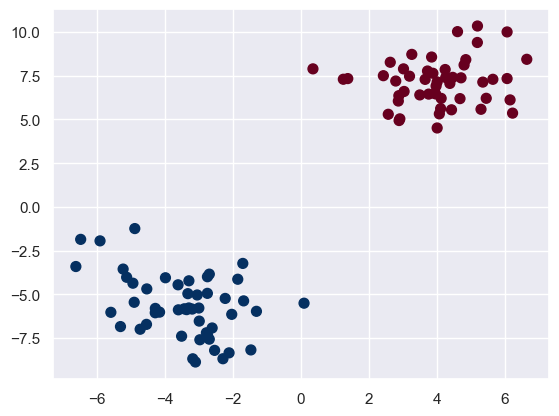

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="RdBu")

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
model=GaussianNB()

In [8]:
model.fit(X,y)

GaussianNB()

In [9]:
rng=np.random.RandomState(0)
X_new=[-6,-14]+[14,18]*rng.randn(1000,2)

In [10]:
y_new=model.predict(X_new)

(-7.277940998847735, 7.310290456387769, -9.820948904341858, 11.301500621508525)

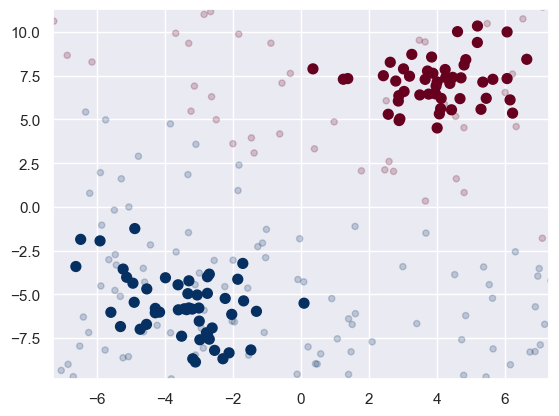

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="RdBu")
lim=plt.axis()
plt.scatter(X_new[:,0],X_new[:,1],c=y_new,s=20,cmap="RdBu",alpha=0.2)
plt.axis(lim)

In [12]:
from sklearn.datasets import fetch_20newsgroups
df=fetch_20newsgroups

In [15]:
categories=["talk.religion.misc","soc.religion.christian","sci.space","comp.graphics"]

In [16]:
train=fetch_20newsgroups(subset="train",categories=categories)
test=fetch_20newsgroups(subset="test",categories=categories)

In [17]:
train.data[5]

"From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)\nSubject: Federal Hearing\nOriginator: dmcgee@uluhe\nOrganization: School of Ocean and Earth Science and Technology\nDistribution: usa\nLines: 10\n\n\nFact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the\nuse of the bible reading and prayer in public schools 15 years ago is now\ngoing to appear before the FCC with a petition to stop the reading of the\nGospel on the airways of America.  And she is also campaigning to remove\nChristmas programs, songs, etc from the public schools.  If it is true\nthen mail to Federal Communications Commission 1919 H Street Washington DC\n20054 expressing your opposition to her request.  Reference Petition number\n\n2493.\n"

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [22]:
model2=make_pipeline(TfidfVectorizer(),MultinomialNB())

In [23]:
model2.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [24]:
etiketler=model2.predict(test.data)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
mat=confusion_matrix(test.target,etiketler)

Text(110.44999999999996, 0.5, 'Predict Values')

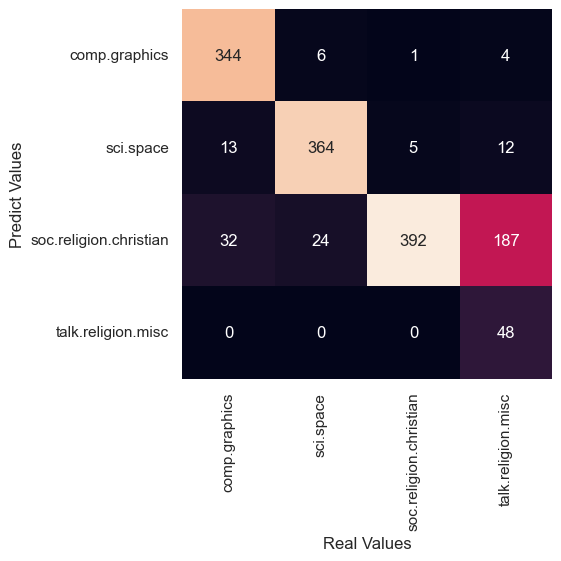

In [27]:
sns.heatmap(mat.T,square=True,annot=True,fmt="d",cbar=False,
           xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel("Real Values")
plt.ylabel("Predict Values")

In [28]:
def predict_category(s,train=train,model=model2):
    pred=model2.predict([s])
    return train.target_names[pred[0]]
    

In [29]:
predict_category("islam vs atheism")

'soc.religion.christian'

In [31]:
predict_category("determining the screen resolution")

'comp.graphics'